## Module 3, Section 2: Visualising Dense Data

We’re going to use a new dataset in these exercises that has a lot of dense data. Its a synthetic dataset that's been generated to deliberately have issues with overplotting. 

In [180]:
# import packages/libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv("synthetic_data.csv")
df

,x,y,group
0,9.605790,9.365541,A
1,9.309863,9.338445,A
2,10.646857,12.719318,A
3,10.868921,7.287356,A
4,9.212827,11.437232,A
...,...,...,...
59995,10.520075,14.060745,C
59996,12.849821,16.139191,C
59997,8.854607,13.473794,C
59998,8.124796,14.492870,C


Overplotting is common and occurs when you have many observations close together or with the same values. See the following scatterplot of the synthetic data we've imported.

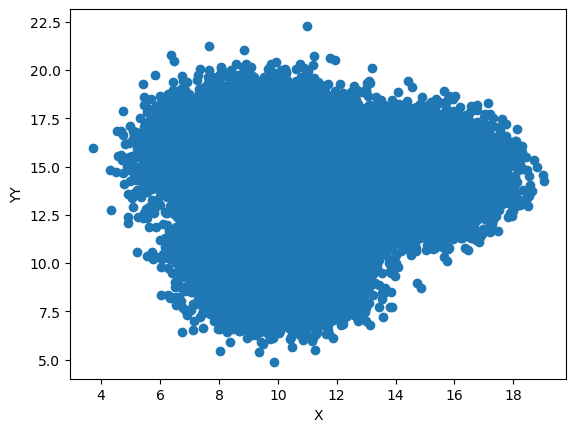

In [181]:
fig, ax = plt.subplots()
ax.scatter(df.x, df.y)
ax.set_xlabel("X")
ax.set_ylabel("YY")

plt.show()

There doesn’t seem to be a relationship between x and y, but let's first plot a 2-dimensional histogram of the data to see more. This will give us a better view of the distribution of the points. For more information about 2d histograms with Matplotlib, see [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist2d.html#matplotlib.axes.Axes.hist2d).

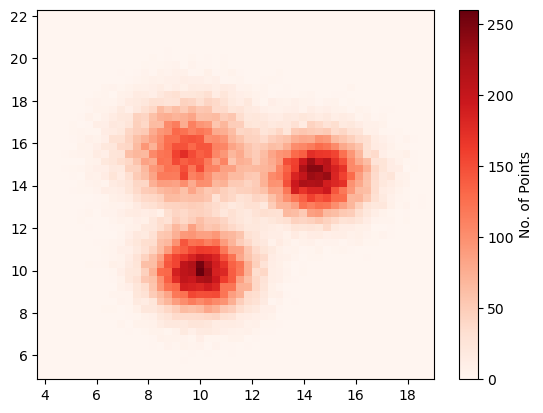

In [192]:
fig, ax = plt.subplots()
img = ax.hist2d(df.x, df.y, bins = 50, cmap = "Reds")
plt.colorbar(img[3], ax=ax, label = "No. of Points")
plt.show()

So, we can see there are three clusters of data that are not visible in the first scatterplot. Let's start working through some possible solutions.

## Point size and transparency

We can alter the point size and transparency. Smaller point sizes means there will be less overlapping points, and if we make the points slightly transparent, we'll see darker regions where there is more data. 

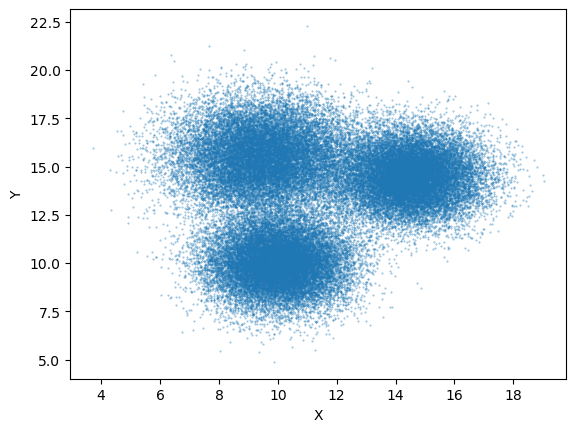

In [198]:
fig, ax = plt.subplots()
ax.scatter(df.x, df.y, s = 0.2, alpha = 0.5)
ax.set_xlabel("X") # X-axis label
ax.set_ylabel("Y") # Y-axis label
plt.show() # Command to show plot

**Exercises:** 
1) Identify what arguments respectively altered point size and transparency.\
2) Experiment with different point sizes and transparency. What is the maximum and minimum range you can vary transparency? Use the plt.scatter [reference page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to answer this.\
3) One other obvious thing we have not attempted here is to change the figure size. Increase the figure size using **plt.figure**, we've done this already for the time-series plots in the past few activities. Amend the axis labels so they are in proportion to your new figure size (they'll be be smaller the larger your figure is, since their font size is fixed).

Sometimes less is more. Plotting a subset of the data (5% here) can help avoid overplotting, and can also greatly reduce the computing time.

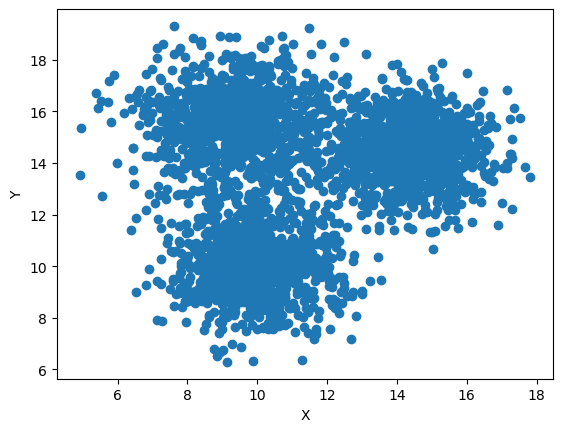

In [196]:
df_subset = df.sample(frac = 0.05)

fig, ax = plt.subplots()
ax.scatter(df_subset.x, df_subset.y)
ax.set_xlabel("X") # X-axis label
ax.set_ylabel("Y") # Y-axis label
plt.show() # Command to show plot

**Exercise:** Give an example of a situation where sampling is not a good approach. **HINT:** Think about extreme, rare values that you don't want to ignore.

## Grouping with colour

There are three groups in our dataset:

In [125]:
df.group.unique()

array(['A', 'B', 'C'], dtype=object)

Let's colour our data by group.

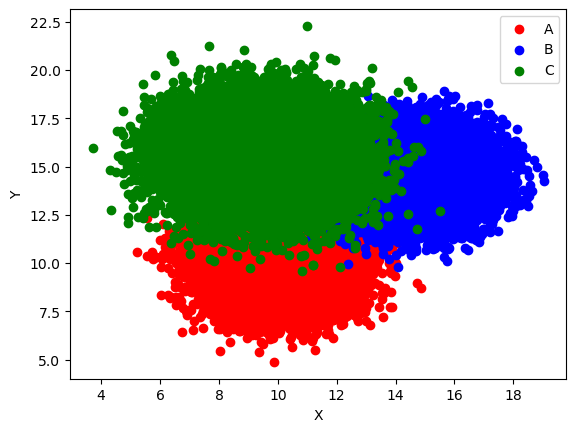

In [199]:
groups = df.group.unique()

df_A = df[df.group == groups[0]]
df_B = df[df.group == groups[1]]
df_C = df[df.group == groups[2]]

fig, ax = plt.subplots()

plt1 = ax.scatter(df_A.x, df_A.y, label = groups[0], c = "r")
plt2 = ax.scatter(df_B.x, df_B.y, label = groups[1], c = "b")
plt3 = ax.scatter(df_C.x, df_C.y, label = groups[2], c = "g")
plt.legend([plt1, plt2, plt3], groups)

ax.set_xlabel("X") # X-axis label
ax.set_ylabel("Y") # Y-axis label
plt.show() # Command to show plot

**Exercises:** 
1) Grouping with colour alone can make the situation worse - now groups B and C are obscured by group A. Use the point size and transparency arguments to remedy this. Note with the legend, the point size will get smaller if you change the point size in the plot. Use the **markerscale** argument in legend to fix this. If you set **markerscale = 1/s**, where **s** is your point size, you'll make the legend point size invariant to the plot point size. \
2) What if we only care about group B? How could we use colours to highlight only group B?

## Faceting

Faceting a dataset generates a figure with subplots for different groupings of the data. We'll hear a little bit more about faceting in the next Module. In the meantime, faceting is a great way to deal with a dense data, with individual subplots uncovering information about different subsets of the data that may be hidden in a single figure. Let's use a more interesting dataset for this section. We'll look at a dataset containing the number of bicycle hires per day from a bike share company in Washington DC, with a range of environmental variables. Information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset). 

In [130]:
bike_df = pd.read_csv("bike_data.csv")
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Let's generate a scatterplot of normalised temperature (temp) and number of total daily bicycle hires (cnt), coloured by season. Note how the seasons are coded - 1: winter, 2: spring, 3: summer, 4: autumn. 

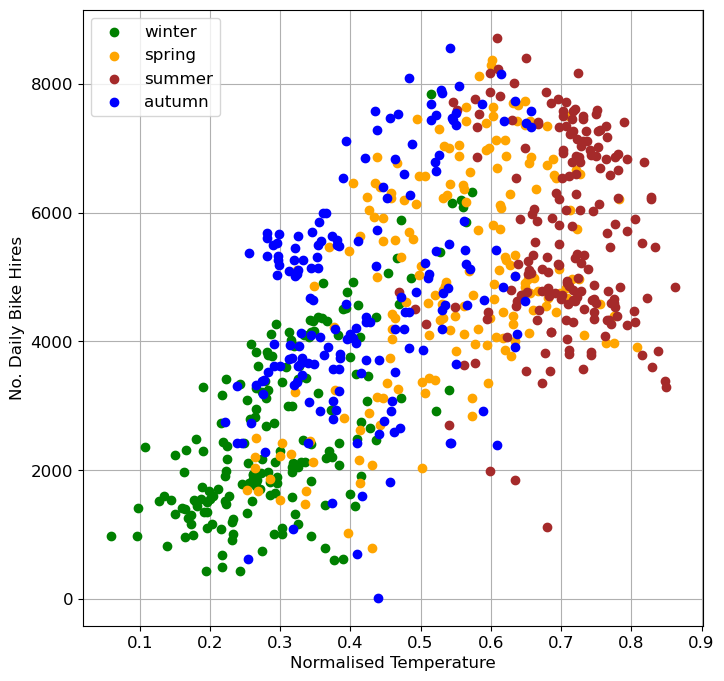

In [202]:
seasons = ["winter", "spring", "summer", "autumn"]

winter_df = bike_df[bike_df.season == 1]
spring_df = bike_df[bike_df.season == 2]
summer_df = bike_df[bike_df.season == 3]
autumn_df = bike_df[bike_df.season == 4]

fig, ax = plt.subplots()
winter = ax.scatter('temp', 'cnt', data=winter_df, marker='o', color='green')
spring = ax.scatter('temp', 'cnt', data=spring_df, marker='o', color='orange')
summer = ax.scatter('temp', 'cnt', data=summer_df, marker='o', color='brown')
autumn = ax.scatter('temp', 'cnt', data=autumn_df, marker='o', color='blue')
ax.legend([winter, spring, summer, autumn], seasons)

ax.set_xlabel("Normalised Temperature") # X-axis label
ax.set_ylabel("No. Daily Bike Hires") # Y-axis label

plt.show() # Command to show plot

We can see the number of daily hires increases with temperature, but the visualisation is cluttered, and we can't easily distinguish by season. Let's try facetting. We've actually done this already with the time series data.

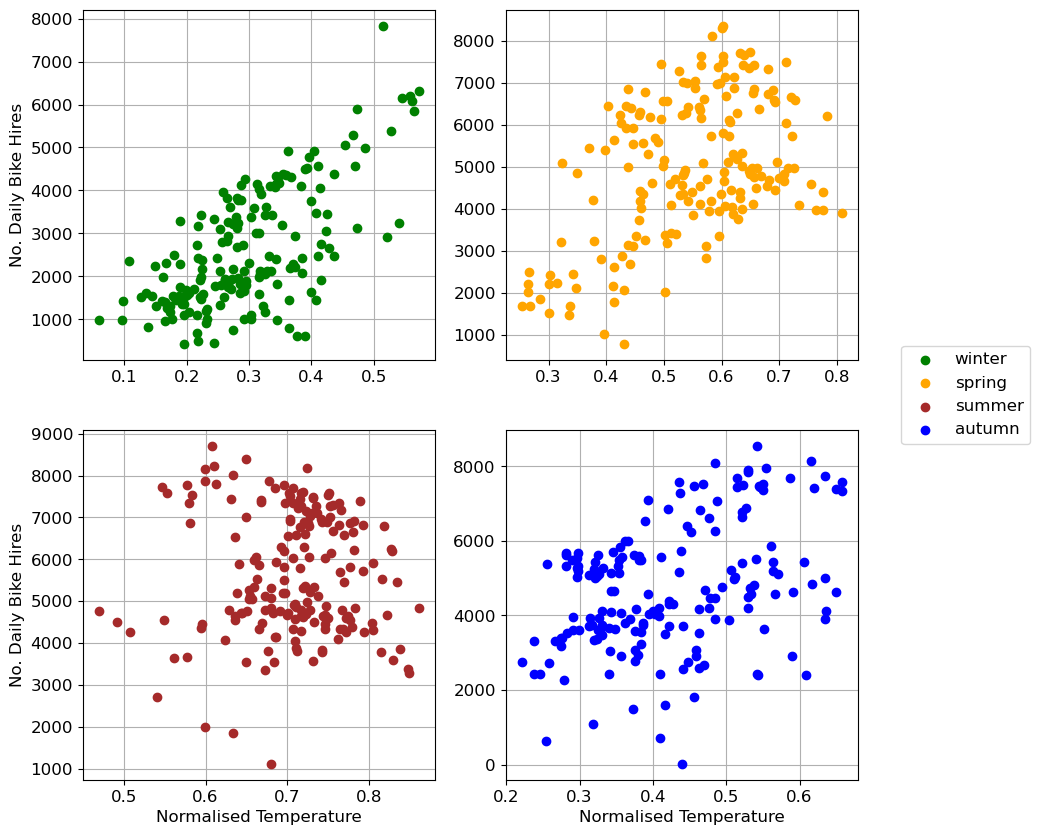

In [204]:
#seasons = ["winter", "spring", "summer", "autumn"]

#winter_df = bike_df[bike_df.season == 1]
#spring_df = bike_df[bike_df.season == 2]
#summer_df = bike_df[bike_df.season == 3]
#autumn_df = bike_df[bike_df.season == 4]

## Create lists of font specifications for titles, x and y axis labels
def set_pub(): ## Define 'def' a function with style features
    matplotlib.rcParams.update({
        "figure.figsize": (8,8), # Figure size can be updated here too (figure width and heigh, in inches)
        "axes.labelsize": 12,
        "xtick.labelsize": 12,   # large tick labels
        "ytick.labelsize": 12,
        "legend.fontsize": 12, # legend title font size
         "axes.axisbelow": True,
        "axes.grid": True
    })


set_pub()

fig, axs = plt.subplots(2,2,figsize = (10,10))
### TOP ROW
winter = axs[0,0].scatter('temp', 'cnt', data=winter_df, marker='o', color='green')
axs[0,0].set_ylabel("No. Daily Bike Hires") # Y-axis label

spring = axs[0,1].scatter('temp', 'cnt', data=spring_df, marker='o', color='orange')

### BOTTOM ROW
summer = axs[1,0].scatter('temp', 'cnt', data=summer_df, marker='o', color='brown')
axs[1,0].set_ylabel("No. Daily Bike Hires") # Y-axis label
axs[1,0].set_xlabel("Normalised Temperature") # X-axis label

autumn = axs[1,1].scatter('temp', 'cnt', data=autumn_df, marker='o', color='blue')
axs[1,1].set_xlabel("Normalised Temperature") # X-axis label

axs[1,1].legend([winter, spring, summer, autumn], seasons, bbox_to_anchor=(1.1,1.1), loc = "center left")

plt.show() # Command to show plot

matplotlib.rcdefaults()  # restore the default style

**Exercise:** Note the array indexing of the four axes in our figure. From the code, which row and column corresponds to the autumn subplot?

This looks good, we can see there are positive relationships between normalised temperature and daily bike hires in Winter and Spring, but the relationships are much weaker in Summer and Autumn. But, there's a big problem with this figure - the axis limits in the subplots are all different. This makes it very difficult to compare and contrast the subplots. To fix this, we need to manually adjust the axis limits so they are all the same. What do we set them to? So we don't cut out data from any of the subplots, we should use the limits from the full dataset. Matplotlib does this automatically.

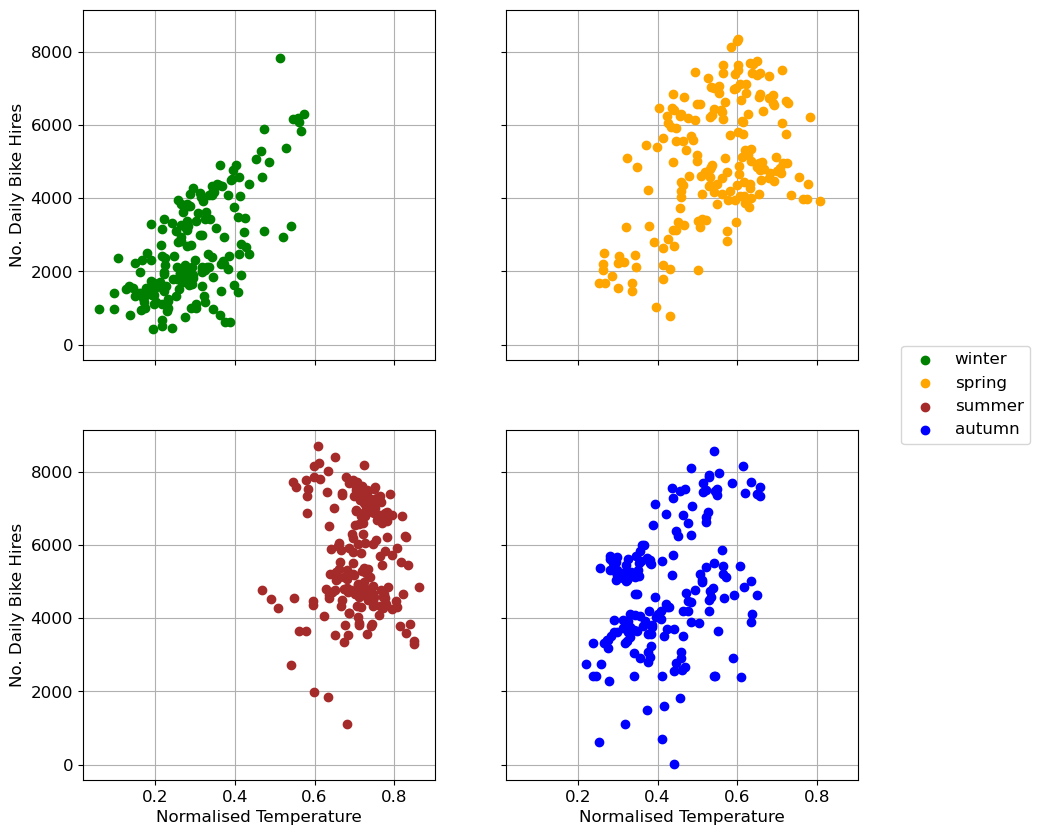

In [206]:

## Create lists of font specifications for titles, x and y axis labels
def set_pub(): ## Define 'def' a function with style features
    matplotlib.rcParams.update({
        "figure.figsize": (8,8), # Figure size can be updated here too (figure width and heigh, in inches)
        "axes.labelsize": 12,
        "xtick.labelsize": 12,   # large tick labels
        "ytick.labelsize": 12,
        "legend.fontsize": 12, # legend title font size
         "axes.axisbelow": True,
        "axes.grid": True
    })


set_pub()

fig, axs = plt.subplots(2,2,figsize = (10,10), sharex = True, sharey = True)
### TOP ROW
winter = axs[0,0].scatter('temp', 'cnt', data=winter_df, marker='o', color='green')
axs[0,0].set_ylabel("No. Daily Bike Hires") # Y-axis label

spring = axs[0,1].scatter('temp', 'cnt', data=spring_df, marker='o', color='orange')

### BOTTOM ROW
summer = axs[1,0].scatter('temp', 'cnt', data=summer_df, marker='o', color='brown')
axs[1,0].set_ylabel("No. Daily Bike Hires") # Y-axis label
axs[1,0].set_xlabel("Normalised Temperature") # X-axis label

autumn = axs[1,1].scatter('temp', 'cnt', data=autumn_df, marker='o', color='blue')
axs[1,1].set_xlabel("Normalised Temperature") # X-axis label

axs[1,1].legend([winter, spring, summer, autumn], seasons, bbox_to_anchor=(1.1,1.1), loc = "center left")

plt.show() # Command to show plot

matplotlib.rcdefaults()  # restore the default style

**Exercise:**
1) In the code above, find where we have specified that all subplots must share x and y-axis limits.\
2) Compare the subplots from the figure above. Compare the shape and range of the data showing normalised temperature and daily bike hires in winter and summer. \
3) The colours are pretty, but are they necessary? Recreate the figure above, experimenting with the colours. If we removed the colours, what other plot features would we need so our audience can tell which season is which? \
4) What does the relationship between daily bike hours and humidity across season look like? Visualise with a facetted figure.\
5) Faceting can also be done very quickly with Seaborn's built-in **FacetGrid** function (documentation [here](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)). Using **FacetGrid**, recreate the facet plot of number of daily bike hires and normalised temperature, grouped by season.

## Jittering

For visualising 2D categorical data, jittering the observations is a way of dealing with overplotting. Let's return to our taxis dataset to explore. We'll be using Seaborn for these visualisations.

In [207]:
# load (and optionally format) dataset
df = pd.read_csv("taxis.csv")

In the last Module, we made box plots and violin plots to visualise the distribution of fare totals across pickup boroughs. Let's look at a violin plot of total fares by pickup borough.

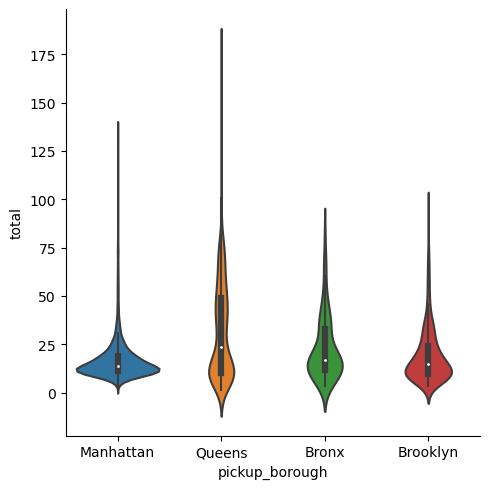

In [216]:
sns.catplot(data=df, kind = "violin",x="pickup_borough",y="total", howfliers=False)
plt.show()

We can use Seaborn's **stripplot** function (documentation [here](https://seaborn.pydata.org/generated/seaborn.stripplot.html)) to visualise the data, and jitter the data around its x-axis label.

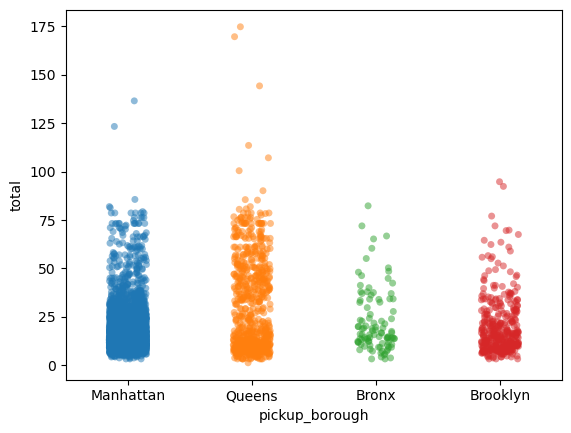

In [215]:
sns.stripplot(data=df, x="pickup_borough",y="total", dodge = True, alpha = 0.5, jitter=0.15)

plt.show()

**Exercise:** 
1) Experiment with the transparency command and jitter width in the strip plot above.\
2) Seaborn is built with Matplotlib, which means we can combine Seaborn visualisations in the same way as other Matplotlib visualisations. Combine the violin plot and strip plot above. This is cool to see how Seaborn integrates with Matplotlib's object-oriented nature, but is the combined plot useful? Why or why not? Would it be more useful if all the violin plot's were grey? Try this.